In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('merged_data_5.csv')
#df=df.drop(df.columns[:1], axis=1)

In [3]:
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL


In [4]:
df['Region'].unique()

array(['Western Europe', 'Middle East and Northern Africa',
       'Australia and New Zealand', 'North America',
       'Central and Eastern Europe', 'Latin America and Caribbean',
       'Southeastern Asia', 'Eastern Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'Southern Asia', nan], dtype=object)

In [5]:
missing = df['Region'].isnull() == True
df.loc[missing,:]

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code
283,2022,xx,NaN,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
region_mapping = {
    'Western Europe': 'WE',
    'Middle East and Northern Africa': 'MENAF',
    'Australia and New Zealand': 'ANZ',
    'North America': 'NAM',
    'Central and Eastern Europe': 'CEE', 
    'Latin America and Caribbean': 'LAC',
    'Southeastern Asia': 'SEAS', 
    'Eastern Asia': 'EAS', 
    'Sub-Saharan Africa':'SSAF',
    'Southern Asia':'SAS',
    'Commonwealth of Independent States':'CIS'
}

df['Region_Code'] = df['Region'].map(region_mapping)

In [7]:
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK,WE
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS,WE
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL,MENAF
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL,WE


In [11]:
df['Country'].nunique()

198

In [8]:
df.to_csv('merged_data_6.csv', index=False)

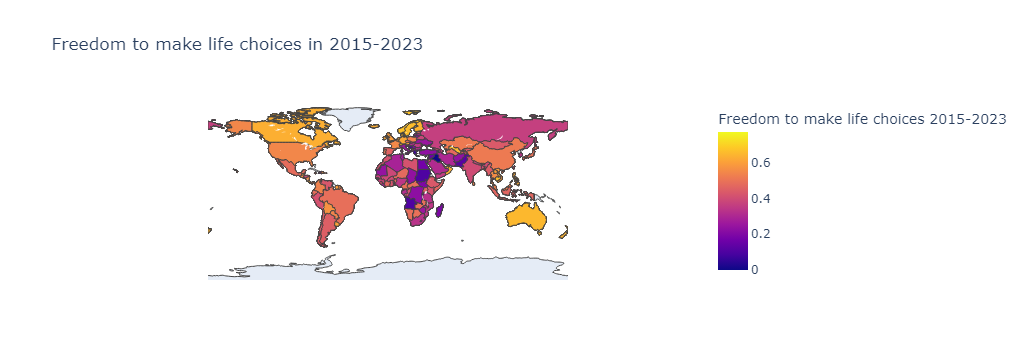

In [9]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Explained_by_Freedom'], 
           text = df['Country'],
           colorbar = {'title':'Freedom to make life choices 2015-2023'})
layout = dict(title = 'Freedom to make life choices in 2015-2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)